In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [3]:
# Reading the 'Weight_Height_Data.csv' file as data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Weight_Height_Data.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# Check the shape of the data frame object
data.shape

(10000, 3)

In [5]:
# Check for missing values
data.isnull().sum()

,0
Gender,0
Height,0
Weight,0


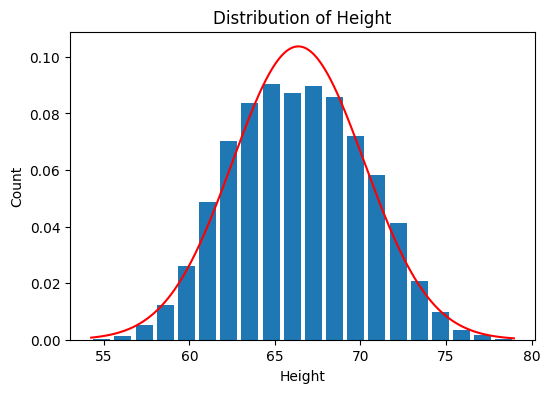

In [13]:
# Plot a bell curve with the histogram for the Height column
plt.figure(figsize = (6,4))
plt.hist(data['Height'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height')
plt.ylabel('Count')
rng = np.arange(data['Height'].min(), data['Height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, data['Height'].mean(), data['Height'].std()), color = 'red')
plt.title('Distribution of Height')
plt.show()

# It is normally distributed

In [15]:
# Get the mean and std for the height column
print('Mean of Height Column is:', data['Height'].mean())
print('std of Height Column is:', data['Height'].std())

Mean of Height Column is: 66.36755975482124
std of Height Column is: 3.8475281207732324


In [18]:
# Remove the outliers from Height column that lies outside the range of three standard deviation
# Three std range is quite famous in industry
height_mean = data['Height'].mean()
height_std = data['Height'].std()

# Define the upper limit
up_lim_height = (height_mean) + (3 * height_std)
low_lim_height = height_mean - (3 * height_std)
print('The upper and Lower limit for the Height column are:', up_lim_height, low_lim_height)

The upper and Lower limit for the Height column are: 77.91014411714094 54.82497539250154


In [19]:
# Extract the data points that are greater than upper limit or lower than lower limit
# They will be the outliers of the data set
data[(data['Height'] > up_lim_height) | (data['Height'] < low_lim_height)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [20]:
# Removing those outliers from the data
height_clean = data[(data['Height'] > low_lim_height) & (data['Height'] < up_lim_height)]
height_clean.shape

(9993, 3)

In [21]:
# Calculate the Z-score for the height column and store them in a seprate column
# The column name is 'Zheight'
data['Zheight'] = (data['Height'] - data['Height'].mean()) / data['Height'].std()
data.head()

,Gender,Height,Weight,Zheight
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [22]:
# Filter out rows from data dataframe based on Zheight column
# Filter out those rows that have Zheight values in the range (-3,3)
z_cleaned = data[(data['Zheight'] > -3) & (data['Zheight'] < 3)]
z_cleaned.shape

(9993, 4)